In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install top2vec==1.0.16
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install 'top2vec[sentence_encoders]'
!pip install 'top2vec[sentence_transformers]'
!pip install 'top2vec[indexing]'
!pip install --upgrade tbb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 44.0 MB/s 
     |████████████████████████████████| 5.2 MB 56.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=4db3883221ffca7a0534d3d16abfaa3a0b39d55f34b3e98a7fd57adae4de9287
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342121 sha256=12a45240f6e5902107e599b5b6f2a7e04e3d6356a4bdc2f5ccd77dd6fe4119f6
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-n

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/all_tweets_by_year/16_17_all_tweets.csv')

In [8]:
df

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2017-07-27 23:58:26+00:00,890723083908259840,Newly-found species of dinosaur was 10ft-tall ...
1,1,2017-07-27 23:57:00+00:00,890722723856609280,Big Brother final EXCLUSIVE: Chanelle McLeary’...
2,2,2017-07-27 23:57:00+00:00,890722723105787904,REVEALED: Grenfell Tower to be torn down by en...
3,3,2017-07-27 23:55:00+00:00,890722219973672964,Elizabeth Hurley reacts with shock at ex Shane...
4,4,2017-07-27 23:50:00+00:00,890720962345410560,You’ll NEVER guess which Orange Is The New Bla...
...,...,...,...,...
312948,312948,2016-07-28 00:18:41+00:00,758456607097298944,Watch this supercut of every 70s and 80s movie...
312949,312949,2016-07-28 00:12:04+00:00,758454944848605184,'Merkel is RUINING our country!' https://t.co/...
312950,312950,2016-07-28 00:12:01+00:00,758454929384144896,"That's some *very* passionate PDA there, @Chan..."
312951,312951,2016-07-28 00:02:01+00:00,758452413175136261,Who wants to see a willy on air? Naked Attract...


In [9]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def lemmatize(row):
    lemmatizer = WordNetLemmatizer()
    row = [lemmatizer.lemmatize(word) for word in row.split()]
    return ' '.join(row)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    lem = URL.apply(lemmatize)
    word_tokens = lem.apply(remove_stopwords) 
    return word_tokens

In [10]:
list_of_xtra_stop_words = ['Djokovic', 'http' ]
stop_words.extend(list_of_xtra_stop_words)

In [11]:
df['preprocessed'] = preprocessing(df['Text'])

In [12]:
data_df_no_stopwords = df.drop_duplicates(subset='preprocessed', keep="first")

In [13]:
list_tweets = [str(i) for i in data_df_no_stopwords['preprocessed']]

In [14]:
%%time 
model = Top2Vec(list_tweets, workers=-2, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-12 14:16:15,929 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-12 14:16:21,290 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-12 14:16:41,261 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-12 14:16:50,726 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

CPU times: user 8min 22s, sys: 29.7 s, total: 8min 52s
Wall time: 3min 7s


In [15]:
# The number of topics Top2Vec has found
model.get_num_topics()

916

In [16]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["muslim"], num_topics=5)
topic_nums

array([ 72,  50, 176, 547, 488])

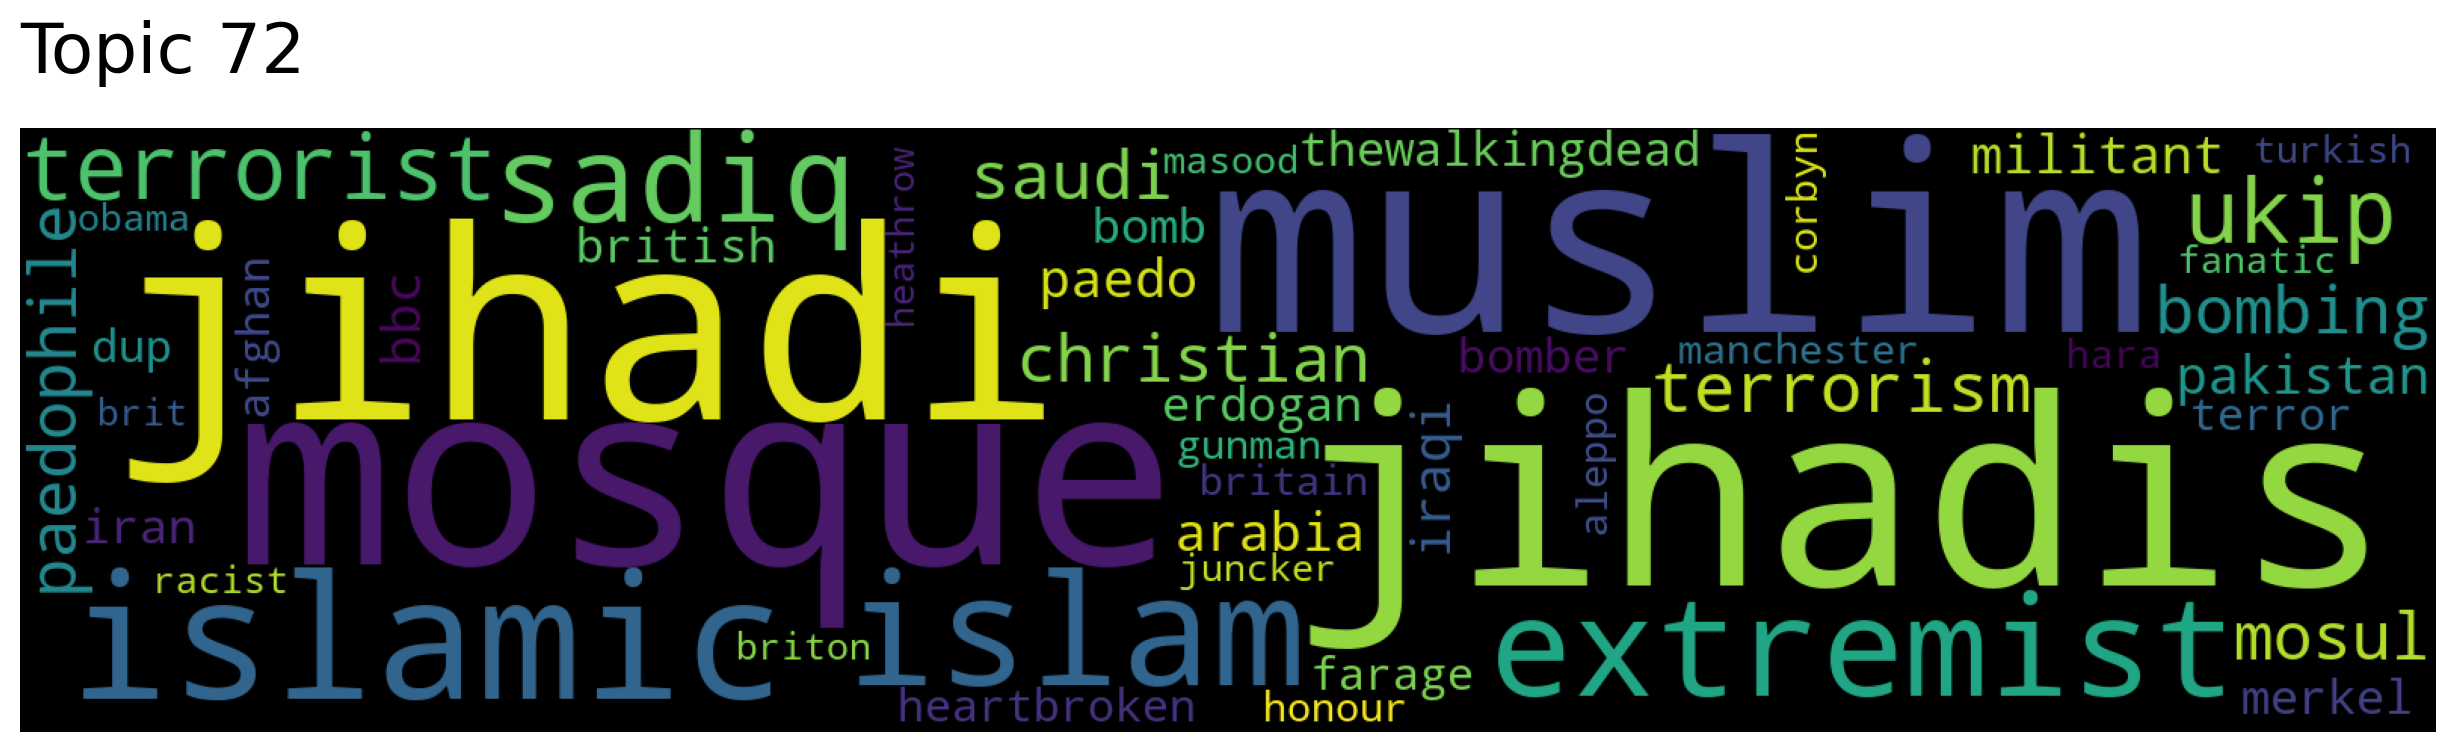

In [25]:
model.generate_topic_wordcloud(topic_num=72)

In [18]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["turkish"], num_topics=5)
topic_nums

array([121, 266, 453, 252, 331])

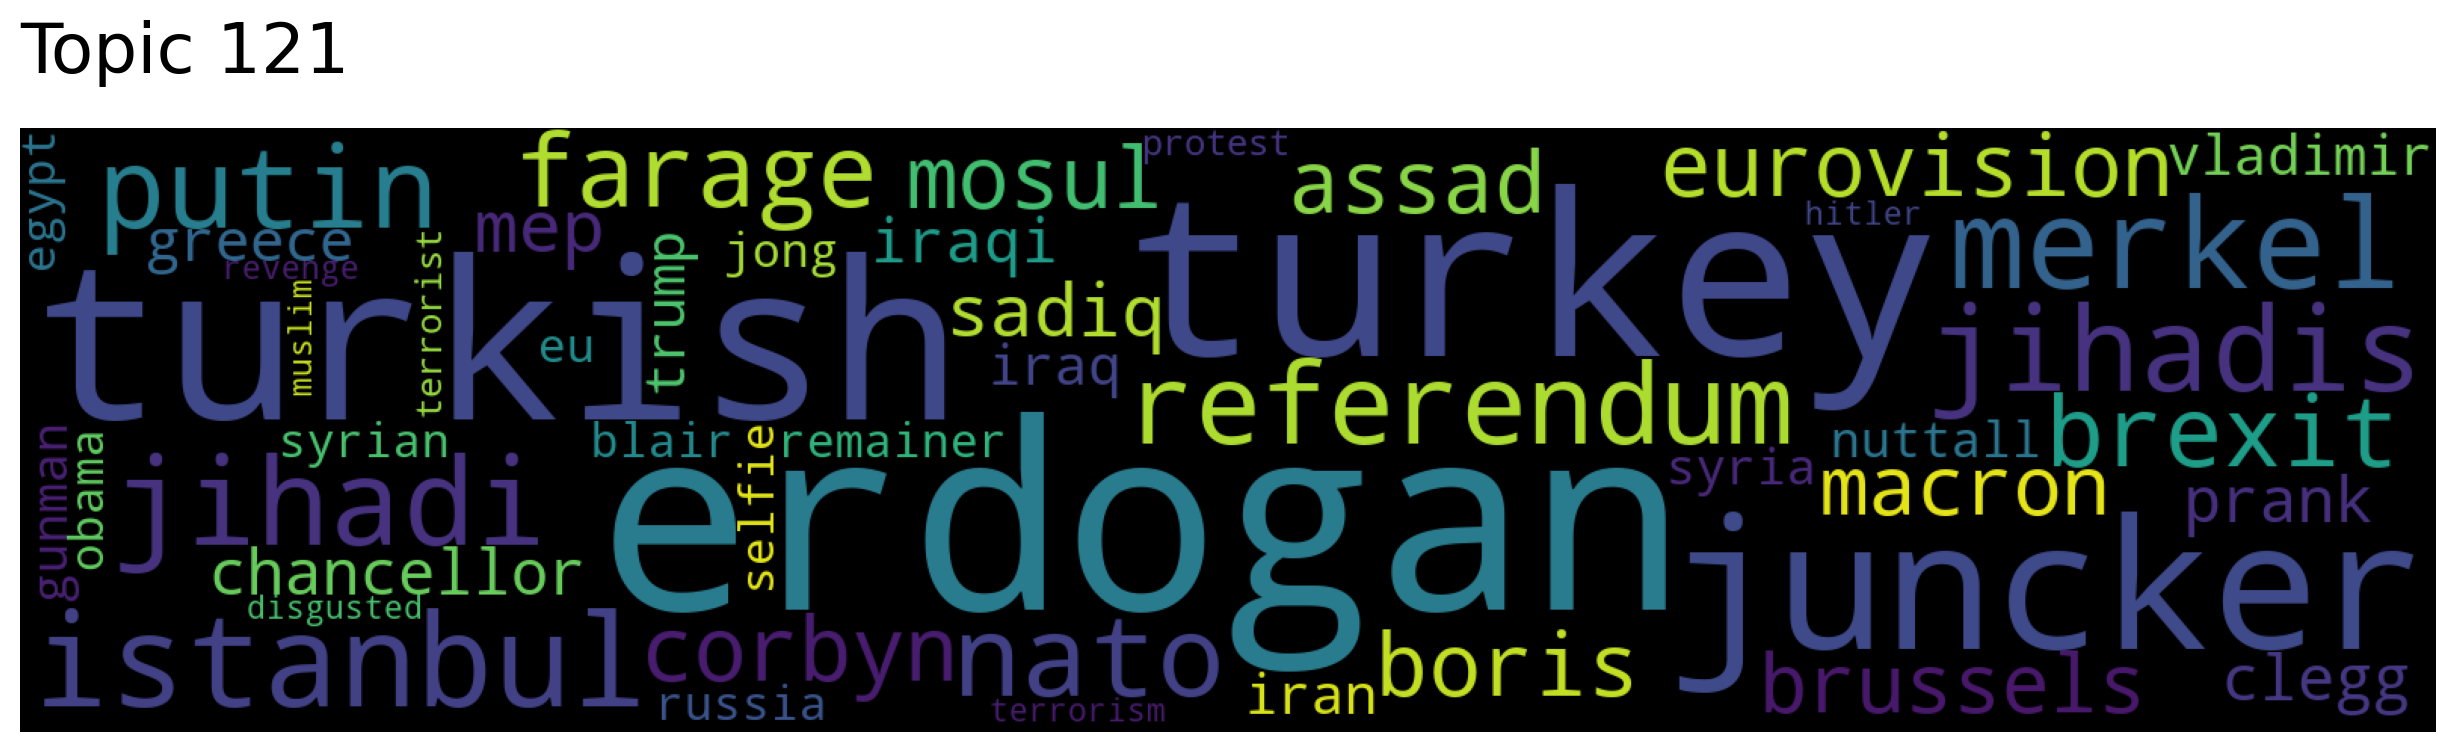

In [26]:
model.generate_topic_wordcloud(topic_num=121)

In [20]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["manchester"], num_topics=5)
topic_nums

array([ 20,  70, 762, 172, 124])

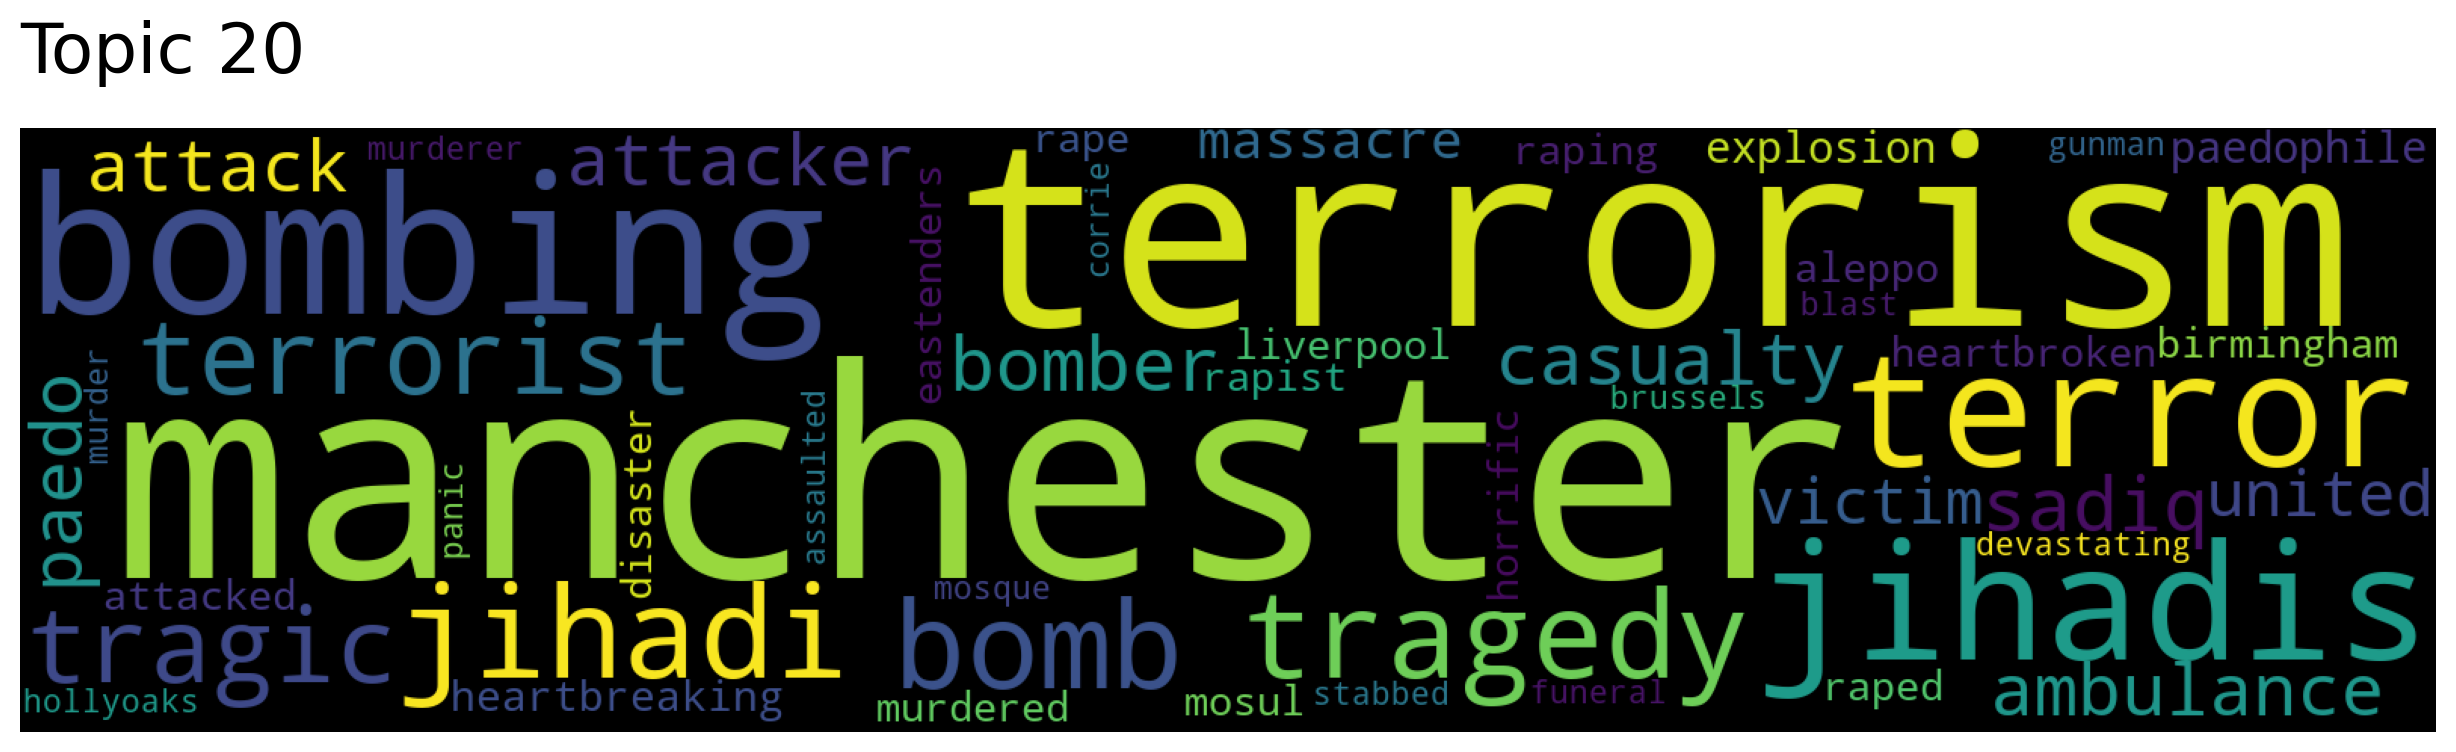

In [27]:
model.generate_topic_wordcloud(topic_num=20)

In [22]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([107,  84, 342, 170,  81])

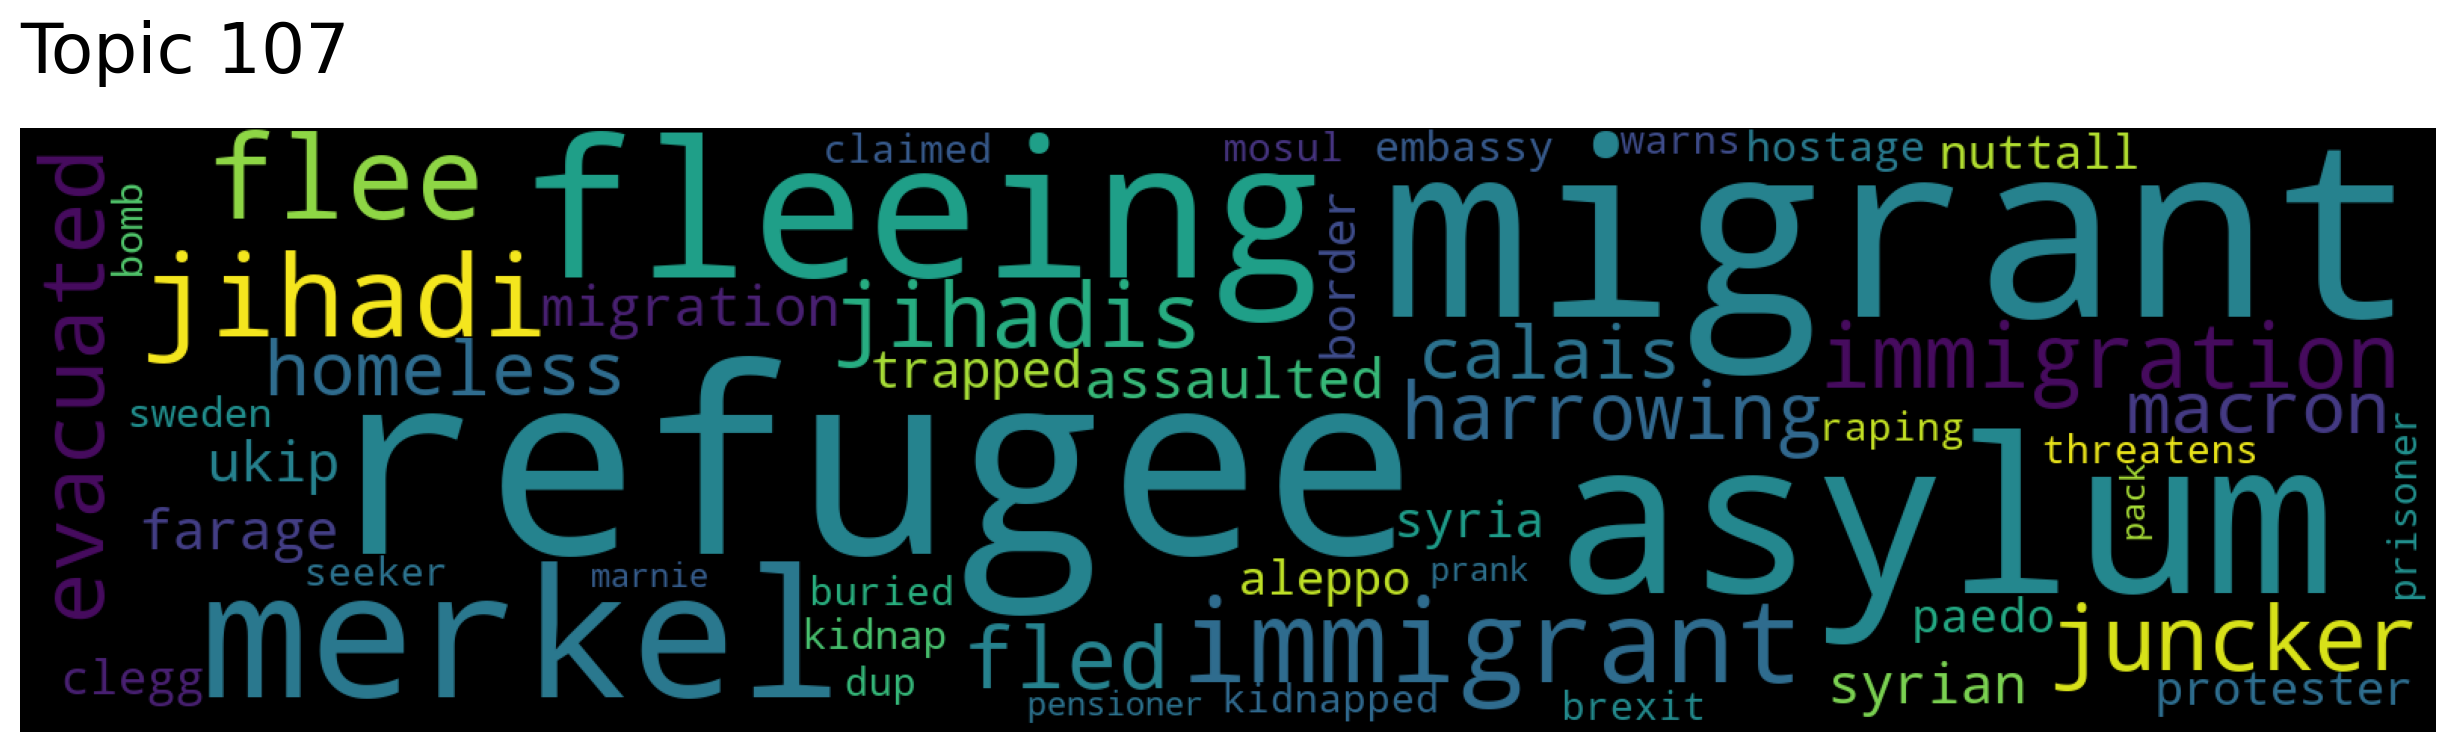

In [28]:
model.generate_topic_wordcloud(topic_num=107)

In [29]:
model.save("2017-18Top2Vec")